In [ ]:
!gdown 1yiLFuEpj_WrDAKzmNuMTdU2dzsQKyN6F

Downloading...
From: https://drive.google.com/uc?id=1yiLFuEpj_WrDAKzmNuMTdU2dzsQKyN6F
To: /content/train.csv
100% 27.8M/27.8M [00:00<00:00, 73.2MB/s]


# 원본데이터

In [ ]:
import pandas as pd

# 데이터 불러오기
data = pd.read_csv("train.csv")
data

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200
1,1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999
2,2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900
3,3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000
4,4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,97500
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188528,188528,Cadillac,Escalade ESV Platinum,2017,49000,Gasoline,420.0HP 6.2L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,White,Beige,None reported,Yes,27500
188529,188529,Mercedes-Benz,AMG C 43 AMG C 43 4MATIC,2018,28600,Gasoline,385.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,8-Speed A/T,White,Black,At least 1 accident or damage reported,Yes,30000
188530,188530,Mercedes-Benz,AMG GLC 63 Base 4MATIC,2021,13650,Gasoline,469.0HP 4.0L 8 Cylinder Engine Gasoline Fuel,7-Speed A/T,White,Black,None reported,Yes,86900
188531,188531,Audi,S5 3.0T Prestige,2022,13895,Gasoline,3.0L,1-Speed Automatic,Daytona Gray Pearl Effect,Black,None reported,NaN,84900


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188533 entries, 0 to 188532
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            188533 non-null  int64 
 1   brand         188533 non-null  object
 2   model         188533 non-null  object
 3   model_year    188533 non-null  int64 
 4   milage        188533 non-null  int64 
 5   fuel_type     183450 non-null  object
 6   engine        188533 non-null  object
 7   transmission  188533 non-null  object
 8   ext_col       188533 non-null  object
 9   int_col       188533 non-null  object
 10  accident      186081 non-null  object
 11  clean_title   167114 non-null  object
 12  price         188533 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 18.7+ MB


In [ ]:
# 원본 데이터 저장
original_data = data.copy()

# 중복된 모델의 브랜드를 가장 빈번한 브랜드로 수정
duplicate_models = data.groupby('model').filter(lambda x: x['brand'].nunique() > 1)

# 중복된 모델의 개수를 고유한 model 이름으로 확인
models_to_fix = duplicate_models['model'].nunique()

print(f"수정해야 할 모델의 개수: {models_to_fix}개, 중복된 개수 : {len(duplicate_models)}개")

# 각 model에 대해 가장 빈번한 brand로 수정
correction_suggestions = duplicate_models.groupby('model').apply(
    lambda group: {
        'model': group['model'].iloc[0],
        'current_brands': group['brand'].unique().tolist(),
        'suggested_brand': group['brand'].mode()[0]
    }
).tolist()

# 수정 실행
for correction in correction_suggestions:
    model = correction['model']
    suggested_brand = correction['suggested_brand']
    data.loc[data['model'] == model, 'brand'] = suggested_brand

# 수정된 인덱스 확인
updated_indices = data[data['brand'] != original_data['brand']].index

# 결과 출력
print(f"수정된 인덱스 개수: {len(updated_indices)}개")

수정해야 할 모델의 개수: 923개, 중복된 개수 : 134102개


<ipython-input-4-4e59e466daf8>:13: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  correction_suggestions = duplicate_models.groupby('model').apply(


수정된 인덱스 개수: 2093개


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188533 entries, 0 to 188532
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            188533 non-null  int64 
 1   brand         188533 non-null  object
 2   model         188533 non-null  object
 3   model_year    188533 non-null  int64 
 4   milage        188533 non-null  int64 
 5   fuel_type     183450 non-null  object
 6   engine        188533 non-null  object
 7   transmission  188533 non-null  object
 8   ext_col       188533 non-null  object
 9   int_col       188533 non-null  object
 10  accident      186081 non-null  object
 11  clean_title   167114 non-null  object
 12  price         188533 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 18.7+ MB


# 데이터 전처리

In [ ]:
# '–'로 표기된 잘못된 데이터를 제거하거나 수정

# 오기입된 정보 삭제 (fuel_type, engine, transmission)
cleaned_data = data[~((data['fuel_type'] == '–') |
                      (data['engine'] == '–') |
                      (data['transmission'] == '–'))]

# '–' 값을 'unknown'으로 대체 (cleaned_data가 슬라이스에서 유래되었을 경우)
cleaned_data.loc[:, 'ext_col'] = cleaned_data['ext_col'].replace('–', 'unknown')
cleaned_data.loc[:, 'int_col'] = cleaned_data['int_col'].replace('–', 'unknown')

# 수정 및 삭제 전후 결과 출력
removed_rows = len(data) - len(cleaned_data)

print(f"원본 데이터 행 수: {len(data)}")
print(f"클리닝 후 데이터 행 수: {len(cleaned_data)}")
print(f"제거된 행 수: {removed_rows}개")

# ext_col, int_col 수정된 결과 확인
ext_unknown_count = (cleaned_data['ext_col'] == 'unknown').sum()
int_unknown_count = (cleaned_data['int_col'] == 'unknown').sum()

print(f"ext_col에서 'unknown'으로 대체된 값: {ext_unknown_count}개")
print(f"int_col에서 'unknown'으로 대체된 값: {int_unknown_count}개")

원본 데이터 행 수: 188533
클리닝 후 데이터 행 수: 187527
제거된 행 수: 1006개
ext_col에서 'unknown'으로 대체된 값: 351개
int_col에서 'unknown'으로 대체된 값: 4447개


In [ ]:
# 1. 'accident' 열의 결측치 행 제거
cleaned_data = cleaned_data.dropna(subset=['accident'])

# 2. 'clean_title' 열의 결측치를 'No'로 대체
cleaned_data.loc[:, 'clean_title'] = cleaned_data['clean_title'].fillna('No')

# 3. 'fuel_type' 열의 결측치를 'Electric'으로 대체]
cleaned_data.loc[:, 'fuel_type'] = cleaned_data['fuel_type'].fillna('Electric')
cleaned_data.loc[cleaned_data['fuel_type'] == 'not supported', 'fuel_type'] = 'Hydrogen'

# 결
# 인덱스 리셋 (기존 인덱스 제거)
cleaned_data.reset_index(drop=True, inplace=True)

# 결과 확인
print("인덱스가 리셋되었습니다.")

# 결과 확인
print(f"결측치 처리 후 데이터:")
print(cleaned_data.info())

# 결측치 처리 전후 비교
print(f"처리 후 데이터 행 수: {len(cleaned_data)}")


인덱스가 리셋되었습니다.
결측치 처리 후 데이터:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185096 entries, 0 to 185095
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            185096 non-null  int64 
 1   brand         185096 non-null  object
 2   model         185096 non-null  object
 3   model_year    185096 non-null  int64 
 4   milage        185096 non-null  int64 
 5   fuel_type     185096 non-null  object
 6   engine        185096 non-null  object
 7   transmission  185096 non-null  object
 8   ext_col       185096 non-null  object
 9   int_col       185096 non-null  object
 10  accident      185096 non-null  object
 11  clean_title   185096 non-null  object
 12  price         185096 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 18.4+ MB
None
처리 후 데이터 행 수: 185096


In [ ]:
cleaned_data

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200
1,1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999
2,2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900
3,3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000
4,4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,97500
...,...,...,...,...,...,...,...,...,...,...,...,...,...
185091,188528,Cadillac,Escalade ESV Platinum,2017,49000,Gasoline,420.0HP 6.2L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,White,Beige,None reported,Yes,27500
185092,188529,Mercedes-Benz,AMG C 43 AMG C 43 4MATIC,2018,28600,Gasoline,385.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,8-Speed A/T,White,Black,At least 1 accident or damage reported,Yes,30000
185093,188530,Mercedes-Benz,AMG GLC 63 Base 4MATIC,2021,13650,Gasoline,469.0HP 4.0L 8 Cylinder Engine Gasoline Fuel,7-Speed A/T,White,Black,None reported,Yes,86900
185094,188531,Audi,S5 3.0T Prestige,2022,13895,Gasoline,3.0L,1-Speed Automatic,Daytona Gray Pearl Effect,Black,None reported,No,84900


# 카테고리화 2


In [ ]:
# 국가별 브랜드 리스트 정의
countries = {
    'USA': [
        'Lincoln', 'Chevrolet', 'Ford', 'Tesla', 'Cadillac', 'GMC', 'Buick',
        'Rivian', 'RAM', 'Hummer', 'Dodge', 'Jeep', 'Chrysler', 'Lucid',
        'Karma', 'Scion', 'Pontiac', 'Saturn', 'Mercury', 'Plymouth'
    ],
    'Germany': [
        'Mercedes-Benz', 'Audi', 'BMW', 'Porsche', 'smart', 'Maybach', 'Bugatti', 'Volkswagen'
    ],
    'Italy': [
        'Alfa', 'Lamborghini', 'Ferrari', 'Maserati', 'FIAT'
    ],
    'United Kingdom': [
        'MINI', 'Land', 'McLaren', 'Jaguar', 'Aston',
        'Rolls-Royce', 'Bentley', 'Lotus'
    ],
    'Sweden': [
        'Saab', 'Polestar',  'Volvo'
    ],
    'Japan': [
        'Toyota', 'Honda', 'Lexus', 'INFINITI', 'Nissan',
        'Acura', 'Mitsubishi', 'Mazda', 'Subaru', 'Suzuki'
    ],
    'South Korea': [
        'Genesis', 'Hyundai', 'Kia'
    ]
}


brand_class = {
    'Mainstream': [
        'Chevrolet', 'Ford', 'Toyota', 'Hyundai', 'Volkswagen', 'RAM', 'Jeep',
        'Honda', 'Nissan', 'Dodge', 'Pontiac', 'Saturn', 'Chrysler', 'Mazda',
        'Subaru', 'Scion', 'smart', 'FIAT', 'Suzuki', 'Plymouth', 'Kia', 'Mitsubishi'
    ],
    'Premium': [
        'MINI', 'Genesis', 'GMC', 'Buick', 'Rivian', 'Hummer', 'Alfa', 'INFINITI',
        'Lexus', 'Acura', 'Lucid', 'Karma', 'Saab', 'Mercury', 'Polestar'
    ],
    'Luxury': [
        'Lincoln', 'Mercedes-Benz', 'Audi', 'BMW', 'Tesla', 'Cadillac', 'Land', 'Volvo', 'Jaguar', 'Maserati'
    ],
    'Ultra-luxury': [
        'Rolls-Royce', 'Bentley', 'Aston', 'Lamborghini', 'Ferrari', 'Bugatti', 'Maybach'
    ],
    'Sports': [
        'Porsche', 'McLaren', 'Lotus'
    ]
}
# 차종별 키워드 정의
vehicle_types = {
    'Mini': [
        'Yaris', 'i10', 'Granta', 'Picanto', 'Beat', 'Spark', 'Axela', '500', 'ForTwo'
    ],
    'Subcompact': [
        'Accent', 'Fiesta', 'Fit', 'Rio', 'Sonic', 'Beetle', 'Cooper', 'Bolt', 'i3', 'xB', 'Cube', 'C-Max', 'Versa', 'Matrix', 'Matrix XR', 'Matrix XRS', 'Juke'
    ],
    'Compact': [
        'Corolla', 'Civic', 'Elantra', 'Focus', 'Mazda3', 'Lancer', 'Verano', 'Mazda6', 'Accord', 'Camry', 'Altima', 'Jetta', 'Sentra', 'Cruze', 'Prius', 'Insight', 'Dart', 'Impreza', 'Golf', 'GTI', 'Polestar', 'Leaf','Model 3', 'G70', 'IS', 'Q50', 'A3', 'S40', 'ILX', 'Forte', 'C-Class', '3 Series', 'Giulia', 'XE','Passat', 'Malibu', 'Fusion', 'Legacy', 'Avenger', 'TSX', 'A4', 'A5', 'S4', 'S3', 'CLA', 'TL', 'G37',
        'Q40', 'Sonata', '328', '330', '335', '340', '320', '325', 'C30', 'HS', '200', 'CT 200h', 'Optima','ATS', 'G35', 'Protege', '9-3', 'Mirai', 'SX4', 'Integra', 'IONIQ', 'MazdaSpeed3','323', 'Ci', '128', '135', '228', '230', '428', '430', '435', '440', 'TT', 'TT 1.8T', 'TT 2.0T', 'TT RS', 'Quattroporte', 'Outback', 'Outback 2.5i', 'Outback 3.0 R', 'C70', 'CC'
    ],
    'Midsize': [
        'A6', 'A7', 'A8', 'E-Class', '5 Series', 'CX-5', 'CX-9', 'G80', 'Model S', 'Panamera', 'Taycan', 'Ghibli','Q70', 'TLX', 'MKZ', 'CTS', 'S60', 'Arteon', 'Maxima', 'LaCrosse', 'Regal', 'Avalon', 'Azera', 'Stinger','RLX', 'ES', 'GS', 'S80', 'XF', 'Charger', '528', '535', '540', '300', 'Revero', 'Magnum', 'STS', 'CT5','525', '530', '530e', 'Eos', '550', '528', '535', '540', 'Quattroporte Base', 'RL', 'SC 430', 'Durango','Equus', 'K5', '640'
    ],
    'Full-size': [
        'LS', '7 Series', 'S-Class', 'XJ', 'Flying Spur', 'Ghost', 'Phantom', 'Wraith', 'CT6', 'K900', 'MKS', 'Continental', 'Phaeton', 'G90', 'Town Car', 'Impala', 'Lucerne', 'Type 57',
        'EQS', 'Maybach S', 'DeVille', 'Arnage', '740', '750', 'ALPINA', 'RS 7', 'S90', '650', '840', 'XTS', 'DTS'
    ],
    'Sports': [
        'Coupe', 'GT', 'Spyder', 'Stingray', 'Mustang', 'Camaro', 'Sti', 'Boxster', 'Cayman', '911',        'R8', 'GT-R', 'Supra', 'Gallardo', 'Huracan', 'Aventador', 'Murcielago', 'NSX', 'Z4', 'Z3',        'Challenger', 'Charger SRT Hellcat', 'Corvette', 'M2', 'M3', 'M4', 'M5', 'M6', 'M8',        'AMG GT', 'AMG C 63', 'AMG E 63', 'RS5', 'RS3', 'RS4', 'F-Type', 'F430', '488', '812', 'F12',
        'California T', 'Portofino', 'Roma', '720S', '570S', 'GranTurismo', 'GranSport',        'Veloster', 'MX-5', 'Miata', 'Prelude', 'IS-F', 'GTO', 'Prowler', 'Viper', 'S2000', 'BRZ',        'WRX', 'WRX STI', 'RC F', 'LC 500', 'Sky', 'Solstice GXP', 'Q60', 'XK8', 'RSX', 'AMG S 63', 'AMG CLA 45',        'AMG C 43', '86', '350Z', '370Z', 'SL', 'SLK', 'CLK', 'SSR', 'S6', 'RS7', 'Monte Carlo', 'M760',
        'S8', 'Marauder', 'Eos', 'FR-S', 'Evora', 'MC20', 'Veyron', 'DB7', 'Evora 400', 'Z Proto', 'Thunderbird',        'Cascada', 'tC', 'i8', 'XK', 'XKR', 'FF', 'CT5-V Blackwing', '124 Spider', 'XLR', 'S3', 'S5', 'S7', 'RSX Type S',        'RS', 'XK8', 'Firebird', 'Firebird Trans Am', 'Crossfire', 'RC', 'RC 350 F', 'Martin', 'Martin Vantage',        'Martin DBS', 'AMG E 53', '240SX'
    ],
    'SUV': [
        'Ranger', 'Wrangler', 'Forester', 'CR-V', 'X5', 'Q5', 'GLC', 'GLE', 'GLA', 'GLS', 'CX-30', 'CX-3', 'CX-5', 'CX-7', 'CX-9', 'CX-70','LX', 'RAV4', 'Model X', 'Model Y', 'Explorer', 'Navigator', 'Subaru Outback', 'Cherokee', 'Passport', 'Renegade', 'Bronco', 'Trailblazer', 'Telluride', 'Grand Cherokee','Highlander', 'Sequoia', '4Runner', 'Rogue', 'Murano', 'Pathfinder', 'Armada', 'Pilot', 'Element', 'RDX', 'MDX', 'QX60', 'QX70', 'QX80',        'Q3', 'Q7', 'Q8', 'Macan', 'Cayenne', 'Urus', 'Acadia', 'Enclave', 'Envision', 'Encore', 'Equinox', 'Blazer', 'Traverse', 'Trax',
        'Xterra', 'Sorento', 'Sportage', 'Santa Fe', 'Tucson', 'Kicks', 'Niro', 'Soul', 'Venue', 'Palisade','Atlas', 'Tiguan', 'ID.4', 'XC40', 'XC60', 'XC90', 'NX', 'RX', 'UX', 'GX', 'Corsair', 'Nautilus', 'Aviator', 'MKT', 'F-Pace', 'E-Pace', 'I-Pace',       'Bentayga', 'Cullinan', 'DBX', 'Levante', 'Stelvio', 'Defender', 'Discovery', 'Range Rover', 'Velar', 'Evoque', 'R1S', 'H2', 'H3', 'Bronco Sport','Countryman', 'Excursion', 'Suburban', 'Tahoe', 'Yukon', 'Yukon XL', 'Expedition', 'Edge', 'MKC', 'Compass', 'Bolt EUV', 'G-Class', 'G 63', 'LR2', 'LR3', 'LR4', 'GLK', 'ZDX','Venza', 'Ascent', 'Rainier', 'Crosstour', 'Crosstrek', 'Grecale', 'MKX', 'GV70', 'GV80', 'Seltos', 'QX30', 'Q4 e-tron', 'GLB', 'Kona', 'IONIQ 5', 'Vue', 'Montero', 'Flex', 'C40', 'C-HR', 'X1', 'X3', 'X7', 'X2', 'X4', 'X6',        'XC70', 'XT5', 'XT6', 'GV70', 'Durango SRT', 'Outback Touring', 'Outback 3.6R', 'Liberty', 'Grand', 'Terrain'
    ],
    'Van': [
        'Transit', 'Sienna', 'Minivan', 'Odyssey', 'Routan', 'Grand Caravan','Metris', 'NV Passenger', 'Sprinter', 'Express', 'E-250', 'E-350', 'Transit Connect','ProMaster', 'Pacifica', 'Town & Country', 'Hiace', 'Eurovan', 'E150', 'E350', 'Commander'
    ],
    'Truck': [
        'F-150', 'Silverado', 'Ram 2500', 'F-350', '2500', '3500', 'Pickup Truck', 'Dakota','Canyon', 'Sierra', 'Colorado', 'Frontier', 'Ridgeline', 'Gladiator', 'Maverick', 'Tundra', 'Titan', 'ProMaster 3500 High Roof', 'NV200', 'E250 Cargo', 'HUMMER EV','R1T', 'F-250', 'Tacoma', 'Santa Cruz', 'Avalanche', 'Mark LT', 'Baja'
    ]}

# 추가 매핑 정의
additional_mapping = {
    'AMG GL AMG GL 63 4MATIC': 'SUV',
    'EV6 Wind': 'SUV',
    'V60 Cross Country T5': 'SUV',
    'e-tron Premium': 'SUV',
    'XT4 Sport': 'SUV',
    '2 Launch Edition': 'Compact',
    'Air Pure': 'Full-size',
}

# Final refined transmission mapping
transmission_mapping = {
    'Automatic': [
        'A/T', 'Automatic', '1-Speed Automatic', '2-Speed Automatic',
        '4-Speed Automatic', '5-Speed Automatic', '6-Speed Automatic',
        '7-Speed Automatic', '8-Speed Automatic', '9-Speed Automatic',
        '10-Speed Automatic', 'Automatic with Overdrive',
        '7-Speed A/T', '8-Speed A/T', '6-Speed A/T', '10-Speed A/T',
        '9-Speed A/T', '5-Speed A/T', '7-Speed Automatic with Auto-Shift',
        '8-Speed Automatic with Auto-Shift', '9-Speed Automatic with Auto-Shift',
        '6-Speed Automatic with Auto-Shift',
        '6-Speed Electronically Controlled Automatic with O',
        '8-SPEED A/T', '8-SPEED AT', '2-Speed A/T', '4-Speed A/T', '10-Speed Automatic with Overdrive'
    ],
    'Manual': [
        'M/T', 'Manual', '5-Speed M/T', '6-Speed M/T', '7-Speed M/T', '7-Speed',
        '6-Speed Manual', '7-Speed Manual', '8-Speed Manual',
        '6 Speed Mt'
    ],
    'CVT': [
        'CVT', 'CVT Transmission', 'Automatic CVT', 'CVT-F', 'Variable'
    ],
    'Dual Clutch': [
        'DCT', '7-Speed DCT Automatic', 'Dual Shift Mode',
        'Transmission w/Dual Shift Mode'
    ],
    'Single-Speed': [
        'Single-Speed Fixed Gear', '1-Speed A/T', '1-Speed Automatic'
    ],
    'Uncategorized': [
        'F', 'SCHEDULED FOR OR IN PRODUCTION',
        'Transmission Overdrive Switch', '2', '6-Speed', '6 Speed At/Mt'
    ]
}

# Define a mapping function to categorize colors
def categorize_color(color):
    color = color.lower()  # Convert to lowercase for uniformity
    if any(keyword in color for keyword in ['white', 'pearl', 'snow', 'diamond']):
        return 'White'
    elif any(keyword in color for keyword in ['black', 'obsidian', 'raven', 'midnight']):
        return 'Black'
    elif any(keyword in color for keyword in ['gray', 'silver', 'platinum', 'steel', 'titanium']):
        return 'Gray/Silver'
    elif any(keyword in color for keyword in ['blue', 'navy', 'indigo']):
        return 'Blue'
    elif any(keyword in color for keyword in ['red', 'crimson', 'ruby', 'burgundy']):
        return 'Red'
    elif any(keyword in color for keyword in ['green', 'emerald', 'olive', 'lime']):
        return 'Green'
    elif any(keyword in color for keyword in ['yellow', 'orange', 'tangerine']):
        return 'Yellow/Orange'
    elif any(keyword in color for keyword in ['brown', 'beige', 'sand', 'champagne']):
        return 'Brown/Beige'
    elif any(keyword in color for keyword in ['pink', 'purple', 'violet', 'custom']):
        return 'Other'
    else:
        return 'Other'

# Define a function to categorize interior colors into simplified groups
def categorize_interior_color(color):
    color = color.lower()  # Convert to lowercase for uniformity
    if any(keyword in color for keyword in ['black', 'charcoal', 'graphite', 'ebony']):
        return 'Black'
    elif any(keyword in color for keyword in ['gray', 'silver', 'slate', 'titanium']):
        return 'Gray/Silver'
    elif any(keyword in color for keyword in ['white', 'beige', 'ivory', 'macchiato']):
        return 'White/Beige'
    elif any(keyword in color for keyword in ['brown', 'chestnut', 'saddle', 'espresso']):
        return 'Brown'
    elif any(keyword in color for keyword in ['red', 'magma', 'hotspur', 'pimento']):
        return 'Red'
    elif any(keyword in color for keyword in ['blue', 'navy', 'rhapsody']):
        return 'Blue'
    elif any(keyword in color for keyword in ['green', 'cypress', 'agave']):
        return 'Green'
    elif any(keyword in color for keyword in ['yellow', 'orange', 'sakhir']):
        return 'Yellow/Orange'
    else:
        return 'Other'




# 국가별 브랜드 매핑 (대소문자 무시)
def get_country(brand):
    brand_lower = brand.lower()  # 입력값을 소문자로 변환
    for country, brands in countries.items():
        if brand_lower in map(str.lower, brands):  # 브랜드 리스트를 소문자로 변환하여 비교
            return country
    return 'Unknown'  # 목록에 없는 브랜드는 Unknown으로 설정

# 브랜드 클래스 매핑 (대소문자 무시)
def get_class(brand):
    brand_lower = brand.lower()  # 입력값을 소문자로 변환
    for cls, brands in brand_class.items():
        if brand_lower in map(str.lower, brands):  # 브랜드 리스트를 소문자로 변환하여 비교
            return cls
    return 'Other'  # 목록에 없는 브랜드는 Other로 설정

# 차량 유형 분류 함수 정의
def classify_vehicle_type(model_name, additional_mapping=None):
    model_upper = model_name.upper()

    # 추가 매핑이 제공된 경우 먼저 확인
    if additional_mapping:
        for specific_model, vehicle_type in additional_mapping.items():
            if specific_model.upper() in model_upper:
                return vehicle_type

    # 기본 키워드 매핑 적용
    for vehicle_type, keywords in vehicle_types.items():
        for keyword in keywords:
            if keyword.upper() in model_upper:
                return vehicle_type

    return 'Other'

from datetime import datetime

# 현재 연도 가져오기
current_year = datetime.now().year

# 마일리지 카테고리화 함수
def categorize_mileage(mileage):
    if mileage <= 20000:
        return '0-20k'
    elif mileage <= 40000:
        return '20k-40k'
    elif mileage <= 60000:
        return '40k-60k'
    elif mileage <= 80000:
        return '60k-80k'
    elif mileage <= 100000:
        return '80k-100k'
    else:
        return '100k+'

# 차량 나이 계산 및 카테고리화 함수
def categorize_age(model_year):
    age = current_year - model_year
    if age <= 3:
        return 'New'
    elif age <= 7:
        return 'Moderately New'
    elif age <= 12:
        return 'Old'
    else:
        return 'Very Old'

# Transmission 매핑 함수
def map_transmission(transmission_value):
    for category, values in transmission_replacements.items():
        if transmission_value in values:
            return category
    return 'Unknown'

def map_ext_color(color):
    for category, values in ext_color_categories.items():
        if color in values:
            return category
    return 'Unknown'

def map_int_color(color):
    for category, values in int_color_categories.items():
        if color in values:
            return category
    return 'Unknown'

# Transmission 분류 함수
def categorize_transmission(transmission):
    for category, transmission_list in transmission_mapping.items():
        if transmission in transmission_list:
            return category
    return 'Other'  # 매핑되지 않은 값 처리


# 새로운 컬럼 추가
cleaned_data['country'] = cleaned_data['brand'].apply(get_country)
cleaned_data['class'] = cleaned_data['brand'].apply(get_class)
cleaned_data['vehicle_type'] = cleaned_data['model'].apply(lambda x: classify_vehicle_type(x, additional_mapping))
# cleaned_data['mileage_category'] = cleaned_data['milage'].apply(categorize_mileage)
# cleaned_data['age_category'] = cleaned_data['model_year'].apply(categorize_age)
cleaned_data['transmission_category'] = cleaned_data['transmission'].apply(categorize_transmission)
cleaned_data['ext_col_category'] = cleaned_data['ext_col'].apply(categorize_color)
cleaned_data['int_col_category'] = cleaned_data['int_col'].apply(categorize_interior_color)


In [ ]:
unknown_country_brands = cleaned_data[cleaned_data['country'] == 'Unknown']['brand'].unique()
other_class_brands = cleaned_data[cleaned_data['class'] == 'Other']['brand'].unique()

unknown_country_brands, other_class_brands

(array([], dtype=object), array([], dtype=object))

In [ ]:
# 각 vehicle_type 별 고유 모델 수
unique_models_per_type = cleaned_data.groupby('vehicle_type')['model'].nunique()
print("\nUnique models per vehicle type:")
print(unique_models_per_type)


Unique models per vehicle type:
vehicle_type
Compact       494
Full-size      87
Midsize       264
Mini          127
SUV           467
Sports        312
Subcompact     50
Truck          73
Van            21
Name: model, dtype: int64


In [ ]:
# Create a dataFrame to summarize the categories and counts for the relevant columns
columns_to_check = [
    'country', 'class', 'vehicle_type',
    # 'mileage_category', 'age_category',
    'transmission_category', 'ext_col_category', 'int_col_category'
]

category_summary = {}

# Loop through each column and count the unique categories and their occurrences
for col in columns_to_check:
    category_summary[col] = {
        'Categories': cleaned_data[col].nunique(),
        'Counts': cleaned_data[col].value_counts().to_dict()
    }

# Display the summary for each column
category_summary


{'country': {'Categories': 7,
  'Counts': {'USA': 69459,
   'Germany': 58576,
   'Japan': 34115,
   'United Kingdom': 13999,
   'South Korea': 5424,
   'Italy': 2796,
   'Sweden': 727}},
 'class': {'Categories': 5,
  'Counts': {'Mainstream': 79832,
   'Luxury': 69573,
   'Premium': 22057,
   'Sports': 10551,
   'Ultra-luxury': 3083}},
 'vehicle_type': {'Categories': 9,
  'Counts': {'SUV': 48576,
   'Compact': 46633,
   'Sports': 36368,
   'Midsize': 20836,
   'Truck': 11716,
   'Mini': 11551,
   'Full-size': 5427,
   'Subcompact': 2285,
   'Van': 1704}},
 'transmission_category': {'Categories': 6,
  'Counts': {'Automatic': 145001,
   'Dual Clutch': 19045,
   'Manual': 15974,
   'CVT': 2863,
   'Single-Speed': 1852,
   'Uncategorized': 361}},
 'ext_col_category': {'Categories': 9,
  'Counts': {'Black': 52114,
   'White': 49336,
   'Gray/Silver': 44571,
   'Blue': 15404,
   'Red': 11101,
   'Other': 5404,
   'Green': 2822,
   'Brown/Beige': 2256,
   'Yellow/Orange': 2088}},
 'int_col_cat

In [ ]:
cleaned_data

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price,country,class,vehicle_type,transmission_category,ext_col_category,int_col_category
0,0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200,United Kingdom,Premium,Subcompact,Automatic,Yellow/Orange,Gray/Silver
1,1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999,USA,Luxury,Full-size,Automatic,Gray/Silver,White/Beige
2,2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900,USA,Mainstream,Mini,Automatic,Blue,Gray/Silver
3,3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000,South Korea,Premium,Full-size,Dual Clutch,Black,Black
4,4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,97500,Germany,Luxury,Compact,Automatic,Black,White/Beige
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185091,188528,Cadillac,Escalade ESV Platinum,2017,49000,Gasoline,420.0HP 6.2L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,White,Beige,None reported,Yes,27500,USA,Luxury,Midsize,Dual Clutch,White,White/Beige
185092,188529,Mercedes-Benz,AMG C 43 AMG C 43 4MATIC,2018,28600,Gasoline,385.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,8-Speed A/T,White,Black,At least 1 accident or damage reported,Yes,30000,Germany,Luxury,Sports,Automatic,White,Black
185093,188530,Mercedes-Benz,AMG GLC 63 Base 4MATIC,2021,13650,Gasoline,469.0HP 4.0L 8 Cylinder Engine Gasoline Fuel,7-Speed A/T,White,Black,None reported,Yes,86900,Germany,Luxury,SUV,Automatic,White,Black
185094,188531,Audi,S5 3.0T Prestige,2022,13895,Gasoline,3.0L,1-Speed Automatic,Daytona Gray Pearl Effect,Black,None reported,No,84900,Germany,Luxury,Midsize,Automatic,White,Black


# 데이터 분석


In [ ]:
 cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185096 entries, 0 to 185095
Data columns (total 19 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   id                     185096 non-null  int64 
 1   brand                  185096 non-null  object
 2   model                  185096 non-null  object
 3   model_year             185096 non-null  int64 
 4   milage                 185096 non-null  int64 
 5   fuel_type              185096 non-null  object
 6   engine                 185096 non-null  object
 7   transmission           185096 non-null  object
 8   ext_col                185096 non-null  object
 9   int_col                185096 non-null  object
 10  accident               185096 non-null  object
 11  clean_title            185096 non-null  object
 12  price                  185096 non-null  int64 
 13  country                185096 non-null  object
 14  class                  185096 non-null  object
 15  

<ipython-input-23-adc429489882>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


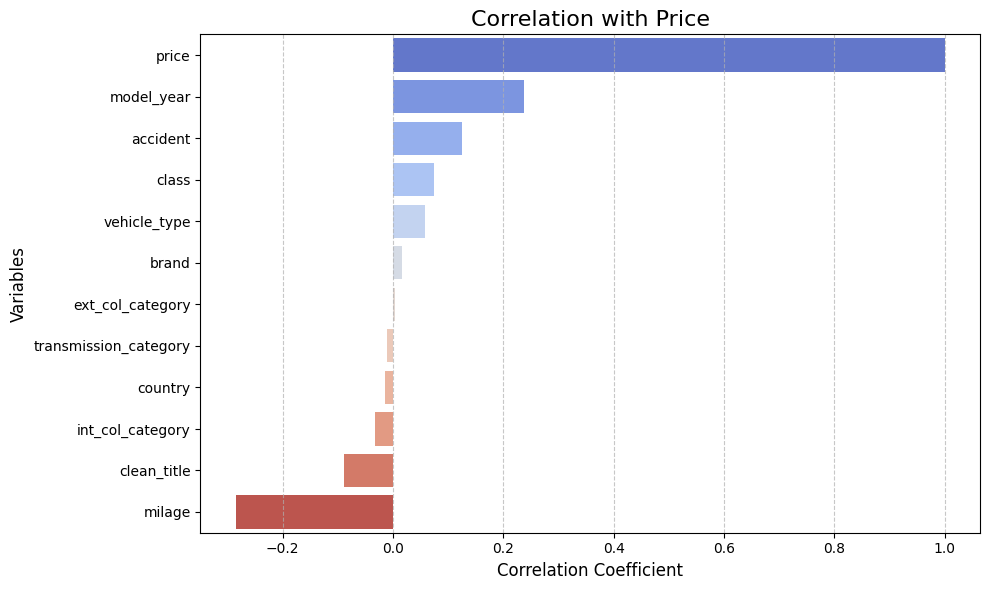

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# 범주형 열 확인
categorical_columns = cleaned_data.select_dtypes(include=['object']).columns

# 데이터 복사 및 라벨 인코딩
encoded_data = cleaned_data.copy()
label_encoders = {}

for column in categorical_columns:
    le = LabelEncoder()
    encoded_data[column] = le.fit_transform(encoded_data[column])
    label_encoders[column] = le


# 분석에 필요한 열 선택 (price와 연관된 변수만)
relevant_columns = [
    'price', 'brand', 'country', 'class', 'model_year', 'milage',
    'vehicle_type', 'transmission_category', 'ext_col_category',
    'int_col_category', 'accident', 'clean_title'
]

# 선택된 열로 데이터 서브셋 생성
price_corr_data = encoded_data[relevant_columns]

# price와 다른 변수들의 상관계수 계산
price_corr_matrix = price_corr_data.corr()['price'].sort_values(ascending=False)

# 가로 막대 그래프 시각화
plt.figure(figsize=(10, 6))
sns.barplot(
    x=price_corr_matrix.values,
    y=price_corr_matrix.index,
    palette="coolwarm", orient='h'
)
plt.title("Correlation with Price", fontsize=16)
plt.xlabel("Correlation Coefficient", fontsize=12)
plt.ylabel("Variables", fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()

# 그래프 표시
plt.show()

In [ ]:
price_corr_matrix

,price
price,1.000000
model_year,0.237724
accident,0.125892
class,0.073978
vehicle_type,0.057835
brand,0.017092
ext_col_category,0.003433
transmission_category,-0.011200
country,-0.014398
int_col_category,-0.032357
